In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [2]:
url = "data/Melbourne_housing_FULL.csv"
df = pd.read_csv(url)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
df["Price"].isnull().sum()

7610

In [4]:
df["Price"].value_counts().sum()

27247

In [5]:
df["Price"].unique()

array([     nan, 1480000., 1035000., ..., 2685000., 1671000., 1605500.])

### Ejercicio 1

- Primero cambio a float la columna Price ya que al tener valores NaN no podía convertirlos a int:

In [6]:
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

- Eliminar valores nan de la columna Price:

In [7]:
df = df.dropna(subset=["Price"])

In [8]:
df["Price"].unique()  #Ya no hay nan

array([1480000., 1035000., 1465000., ..., 2685000., 1671000., 1605500.])

- Cambiar tipo de datos en la columna Price a int:

In [9]:
df["Price"] = df["Price"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  int32  
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longtitude 

C:\Users\Bapa\AppData\Local\Temp\ipykernel_16404\779922643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = df["Price"].astype(int)


- Comprobar nulos:

In [10]:
df["Price"].isnull().sum()

0

In [11]:
df["Price"].value_counts().sum()

27247

In [13]:
df.shape

(27247, 21)

- Porcentaje de filas eliminadas:

In [17]:
filas_iniciales = 34856
filas_finales = 27247

filas_eliminadas = filas_iniciales - filas_finales

porcentaje_perdida = (filas_eliminadas / filas_iniciales) * 100

print(f"{porcentaje_perdida:.2f}%")

21.83%


### Ejercicio 2


- El tipo de propiedad más común:

In [14]:
moda = df["Type"].mode()[0]
moda

'h'

- Porcentaje que representa:

In [15]:
frecuencia = df["Type"].value_counts()[moda]
frecuencia

18472

In [16]:
total_valores = df["Type"].notnull().sum()  
porcentaje = (frecuencia / total_valores) * 100
print(f"{porcentaje:.2f}")

67.79


### Ejercicio 3

- Creación de gráfico que muestre la frecuencia de cada tipo de propiedad en orden descendiente

In [19]:
frecuencias_tipos = df["Type"].value_counts()
frecuencias_tipos = frecuencias_tipos.sort_values(ascending = False) #Ordenar en orden descendente

C:\Users\Bapa\AppData\Local\Temp\ipykernel_16404\208733917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= "Type", order=df["Type"].value_counts().index, palette= "Set3")


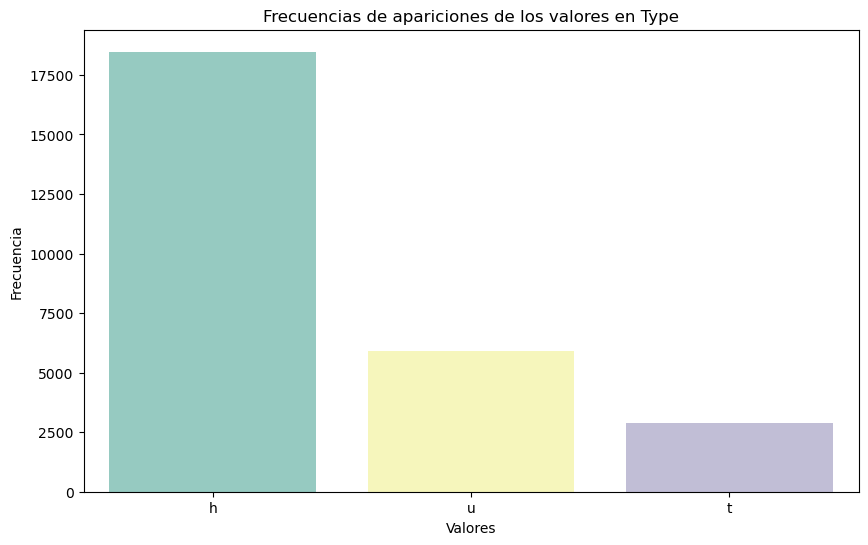

In [23]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.countplot(data=df, x= "Type", order=df["Type"].value_counts().index, palette= "Set3")

# Agregar etiquetas y título
plt.title('Frecuencias de apariciones de los valores en Type')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### Ejercicio 4
- ¿Cómo influye el número de habitaciones la mediana del precio de la vivienda?

In [34]:
mediana_precio = df.groupby("Bedroom2")["Price"].median().reset_index()
mediana_precio

,Bedroom2,Price
0,0.0,851000.0
1,1.0,390000.0
2,2.0,719250.0
3,3.0,920500.0
4,4.0,1201000.0
5,5.0,1570000.0
6,6.0,1820000.0
7,7.0,1550000.0
8,8.0,1405000.0
9,9.0,760000.0


C:\Users\Bapa\AppData\Local\Temp\ipykernel_16404\3830284954.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mediana_precio, x="Bedroom2", y="Price", palette='Blues')


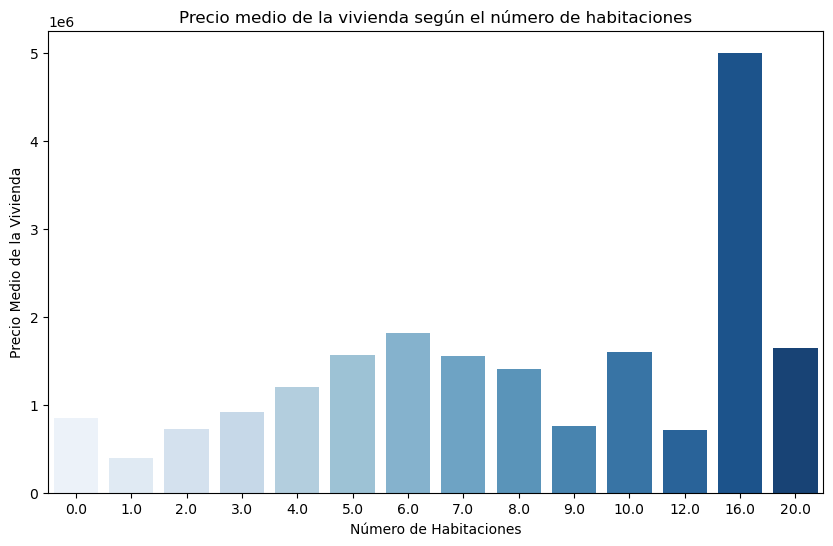

In [36]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.barplot(data=mediana_precio, x="Bedroom2", y="Price", palette='Blues')

plt.title('Precio medio de la vivienda según el número de habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio Medio de la Vivienda')

plt.show()


### Ejercicio 5
- Calcular el coeficiente de correlación de spearman para analizar la relación entre el precio y el número de habitaciones

In [37]:
from scipy.stats import spearmanr

In [40]:
df_cleaned = df[["Bedroom2", "Price"]].dropna()  #Si no lo hacia los valores que me daba eran nan

coeficiente, p_value = spearmanr(df_cleaned["Bedroom2"], df_cleaned["Price"])

coeficiente, p_value

(0.4513703751897803, 0.0)

### Ejercicio 6
- Hay relacion entre la distancia del CBD y el precio de la propiedad, mostrarlo en un scatterplot y calcular el coeficiente de correlacion:

In [47]:
df_cleaned1 = df[['Distance', 'Price']].dropna()
coeficiente1, p_value1 = spearmanr(df_cleaned1["Distance"], df_cleaned1["Price"])

coeficiente1, p_value1

(-0.18809341092744206, 2.0693054050425284e-215)

### Ejercicio 7
- Hay relación entre el tamaño de la propiedad y el precio?

In [48]:
df_cleaned2 = df[["BuildingArea", "Price"]].dropna()
coeficiente2, p_value2 = spearmanr(df_cleaned2["BuildingArea"], df_cleaned2["Price"])
coeficiente2, p_value2

(0.5553540450665009, 0.0)

### Ejercicio 8

In [49]:
df["Landsize"] = pd.qcut(df["Landsize"], q = 7, labels = False)
mediana = df.groupby("Landsize")["Price"].median().reset_index()

C:\Users\Bapa\AppData\Local\Temp\ipykernel_16404\890603075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Landsize"] = pd.qcut(df["Landsize"], q = 7, labels = False)


C:\Users\Bapa\AppData\Local\Temp\ipykernel_16404\1629669034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mediana, x="Landsize", y= "Price", palette='Blues')


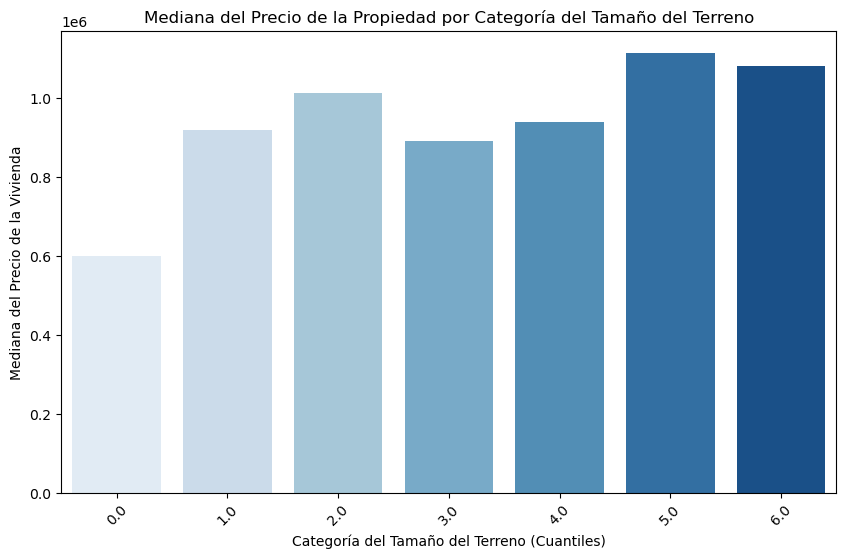

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mediana, x="Landsize", y= "Price", palette='Blues')
plt.title('Mediana del Precio de la Propiedad por Categoría del Tamaño del Terreno')
plt.xlabel('Categoría del Tamaño del Terreno (Cuantiles)')
plt.ylabel('Mediana del Precio de la Vivienda')
plt.xticks(rotation=45)
plt.show()

C:\Users\Bapa\AppData\Local\Temp\ipykernel_16404\224642810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Landsize_inferior"] = pd.qcut(df["Landsize"], q=3, labels=False)
C:\Users\Bapa\AppData\Local\Temp\ipykernel_16404\224642810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mediana_precio_por_categoria_inferior, x="Landsize_inferior", y="Price", palette='Blues')


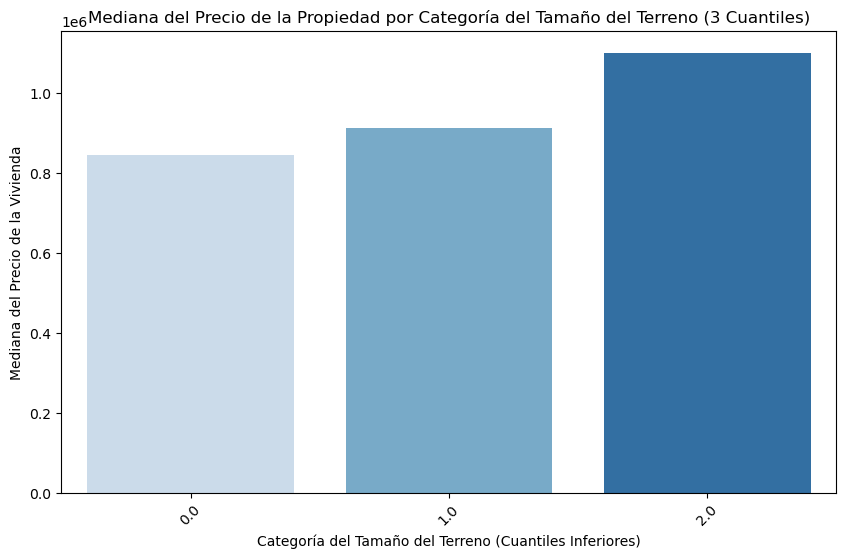

In [51]:
df["Landsize_inferior"] = pd.qcut(df["Landsize"], q=3, labels=False)

mediana_precio_por_categoria_inferior = df.groupby("Landsize_inferior")["Price"].median().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=mediana_precio_por_categoria_inferior, x="Landsize_inferior", y="Price", palette='Blues')
plt.title('Mediana del Precio de la Propiedad por Categoría del Tamaño del Terreno (3 Cuantiles)')
plt.xlabel('Categoría del Tamaño del Terreno (Cuantiles Inferiores)')
plt.ylabel('Mediana del Precio de la Vivienda')
plt.xticks(rotation=45)
plt.show()


### Ejercicio 9

C:\Users\Bapa\AppData\Local\Temp\ipykernel_16404\713535346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Price"], palette='Blues')


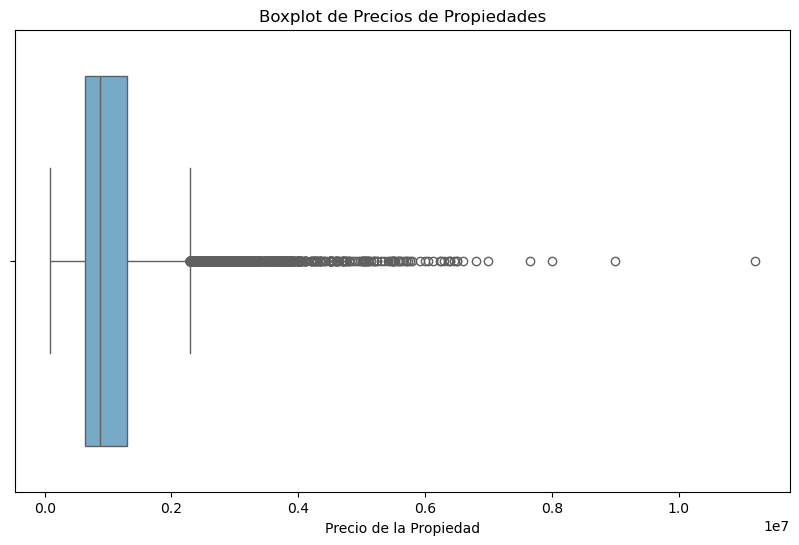

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Price"], palette='Blues')
plt.title('Boxplot de Precios de Propiedades')
plt.xlabel('Precio de la Propiedad')
plt.show()


In [53]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df["Price"] < limite_inferior) | (df["Price"] > limite_superior)]

df_sin_outliers = df[~df.index.isin(outliers.index)]


In [54]:
porcentaje_outliers = (len(outliers) / len(df)) * 100

print(f'{porcentaje_outliers:.2f}%')


4.69%


### Ejercicio 10

In [58]:
data = df["Price"].dropna()
quantiles_data = np.percentile(data, np.linspace(0, 100, len(data)))

In [59]:
quantiles_norm = np.percentile(st.norm.ppf(np.linspace(0.01, 0.99, len(data))), np.linspace(0, 100, len(data)))

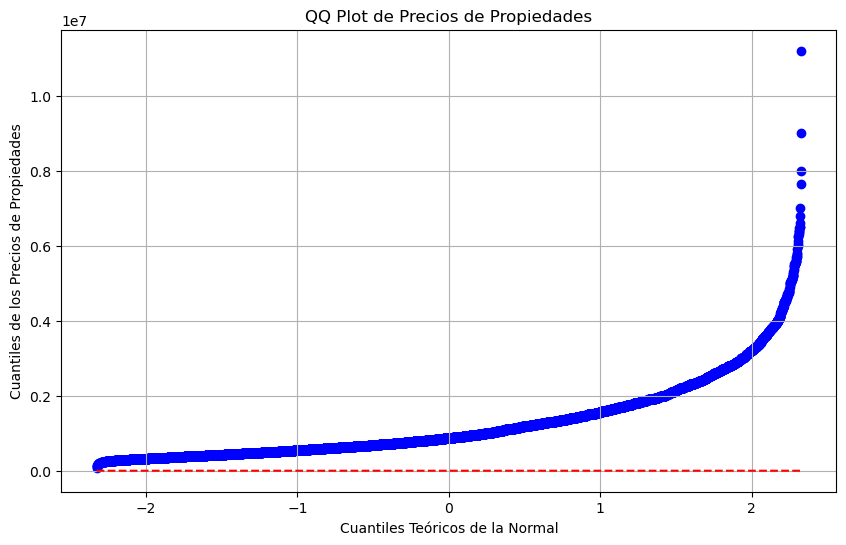

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(quantiles_norm, quantiles_data, color='blue')
plt.plot([quantiles_norm.min(), quantiles_norm.max()], [quantiles_norm.min(), quantiles_norm.max()], color='red', linestyle='--')
plt.title('QQ Plot de Precios de Propiedades')
plt.xlabel('Cuantiles Teóricos de la Normal')
plt.ylabel('Cuantiles de los Precios de Propiedades')
plt.grid()
plt.show()

In [61]:
from scipy.stats import skew, kurtosis

asimetria = skew(data)
curtosis_valor = kurtosis(data)

print(f'Asimetría: {asimetria}')
print(f'Curtosis: {curtosis_valor}')


Asimetría: 2.588826811108291
Curtosis: 13.094577018742875


### Ejercicio 11

In [56]:
resultado_ks = st.kstest(df["Price"], 'norm', args=(np.mean(df["Price"]), np.std(df["Price"])))

estadistico_ks, p_value = resultado_ks
print(f"Estadístico K-S: {estadistico_ks:.4f}, Valor p: {p_value:.4f}")

Estadístico K-S: 0.1375, Valor p: 0.0000


### Ejercicio 12

C:\Users\Bapa\AppData\Local\Temp\ipykernel_16404\3420212049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Type", y= "Price", palette='Set2')


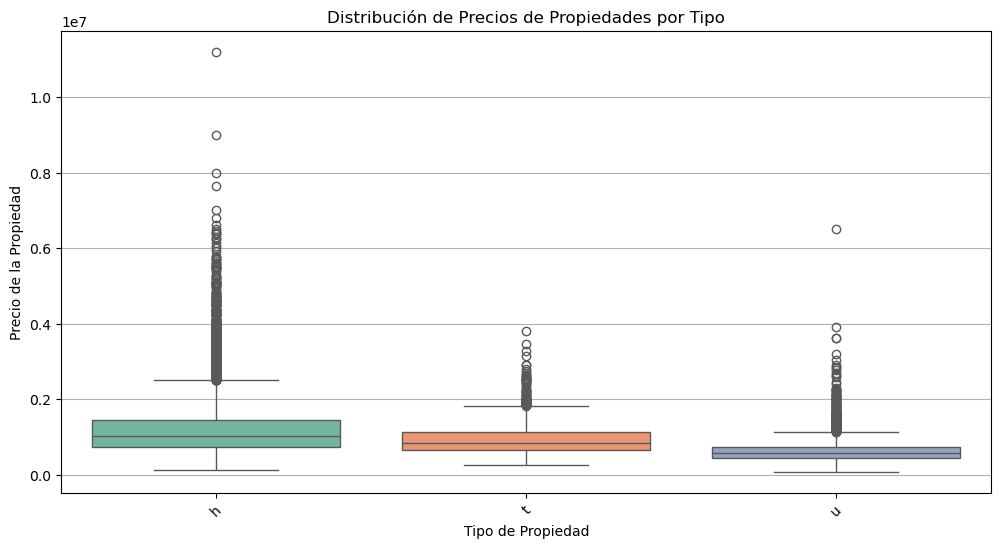

In [62]:
df = df.dropna(subset=["Type", "Price"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Type", y= "Price", palette='Set2')
plt.title('Distribución de Precios de Propiedades por Tipo')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio de la Propiedad')
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.show()

### Ejercicio 13

In [66]:
mediana_region = df.groupby("Regionname")["Price"].median().reset_index()

region_precio_mas_alto = mediana_region.loc[mediana_region["Price"].idxmax()]

region_precio_minimo = mediana_region.loc[mediana_region["Price"].idxmin()]

region_precio_mas_alto

Regionname    Southern Metropolitan
Price                     1250000.0
Name: 5, dtype: object

In [65]:
region_precio_minimo

Regionname    Western Victoria
Price                 412125.0
Name: 7, dtype: object

### Ejercicio 14

In [67]:
df["Price"].max()

11200000

In [68]:
df["Price"].min()

85000

In [69]:
df["Price"].median()

870000.0

In [70]:
bins = [85000, 500000, 1000000, 5000000, 8000000, 11200000]  
labels = ['85k-500k', '500k-1M', '1M-5M', '5M-8M', '8M-11.2M']
df["Rango precios"] = pd.cut(df["Price"], bins=bins, labels=labels)

In [71]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df["Regionname"], df["Rango precios"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [72]:
n = contingency_table.sum().sum()  
phi2 = chi2 / n  
r, k = contingency_table.shape  
cramers_v = np.sqrt(phi2 / min(k-1, r-1))  

In [73]:
print(f"Valor de Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad: {dof}")
print(f"Cramér's V: {cramers_v:.4f}")

Valor de Chi-cuadrado: 4347.3827
Valor p: 0.0000
Grados de libertad: 28
Cramér's V: 0.1997


In [74]:
if cramers_v < 0.1:
    strength = "débil"
elif cramers_v < 0.3:
    strength = "moderada"
else:
    strength = "fuerte"

print(f"La asociación entre la región y el precio es {strength}.")

La asociación entre la región y el precio es moderada.


### Ejercicio 15

In [77]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", dayfirst=True)
df["year"] = df["Date"].dt.year

In [78]:
mediana_precios = df.groupby("year")["Price"].median().reset_index()
earliest_year = mediana_precios['year'].min()
latest_year = mediana_precios['year'].max()

In [81]:
earliest_price = mediana_precios[mediana_precios['year'] == earliest_year]["Price"].values[0]
latest_price = mediana_precios[mediana_precios['year'] == latest_year]["Price"].values[0]
porcentaje_cambio = ((latest_price - earliest_price) / earliest_price) * 100
print(f"{porcentaje_cambio:.2f}")

-5.48


### Ejercicio 16

In [82]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", dayfirst=True)
df['month'] = df["Date"].dt.month_name()


In [83]:
ventas_mensuales = df['month'].value_counts().sort_index()

In [87]:
mes_mas_ventas = ventas_mensuales.idxmax()
mes_mas_ventas

'November'